In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
from io import StringIO
from datetime import timedelta
from scipy.stats import zscore
from datetime import datetime

data = pd.read_csv('S&P_stock_data.csv', index_col=0, parse_dates=True)
#data = pd.read_csv('russell_1000_stock_data.csv', index_col=0, parse_dates=True)
data.head()

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,43.463028,0.843076,NaN,NaN,8.288178,1.277778,NaN,16.274673,28.095690,6.307346,...,NaN,11.282766,NaN,6.848377,18.035810,NaN,4.611939,NaN,25.027779,NaN
2000-01-04,40.142933,0.771997,NaN,NaN,8.051373,1.270833,NaN,14.909400,26.674353,6.241644,...,NaN,10.858897,NaN,7.006068,17.690357,NaN,4.519239,NaN,24.666668,NaN
2000-01-05,37.652863,0.783293,NaN,NaN,8.036574,1.388889,NaN,15.204176,27.063755,6.143094,...,NaN,11.434140,NaN,7.276400,18.654757,NaN,4.542412,NaN,25.138889,NaN
2000-01-06,36.219196,0.715509,NaN,NaN,8.317783,1.375000,NaN,15.328289,26.323891,6.175943,...,NaN,11.969009,NaN,7.208815,19.619167,NaN,4.503788,NaN,23.777779,NaN
2000-01-07,39.237450,0.749401,NaN,NaN,8.406585,1.451389,NaN,16.072987,27.063755,6.274495,...,NaN,11.575432,NaN,7.208815,19.561586,NaN,4.403358,NaN,23.513889,NaN


In [2]:
def get_quarterly_date_ranges(quarter_months):
    # 生成每年的每季度對應日期範圍
    result = []

    initial_start_date = data.loc['2014-12'].index.strftime('%Y-%m-%d')[0]
    initial_end_date   = data.loc['2014-12'].index.strftime('%Y-%m-%d')[-1]
    result.append((initial_start_date, initial_end_date))
    
    for year in range(2015, 2025):
        for month_pair in quarter_months:
            start_month, end_month = month_pair[0], month_pair[1]
            Q_start_mon = f"{year}-{start_month}"
            Q_end_mon   = f"{year}-{end_month}"
            Q_start_date = data.loc[Q_start_mon].index.strftime('%Y-%m-%d')[0]
            Q_end_date   = data.loc[Q_end_mon].index.strftime('%Y-%m-%d')[-1]
            result.append((Q_start_date, Q_end_date))

    # 確保所有日期是 pd.Timestamp 格式
    for i in range(len(result)):
        start_date, end_date = result[i]
        result[i] = (pd.Timestamp(start_date), pd.Timestamp(end_date))  # 替換成新的 tuple
        
    return result
    # 打印結果

def get_date_ranges(mode):
    d = {'Quarter' : get_quarterly_date_ranges([(1, 3), (4, 6), (7, 9), (10, 12)]),
         'Two months': get_quarterly_date_ranges([(1, 2), (3, 4), (5, 6), (7, 8), (9, 10), (11, 12)]),
         'One month': get_quarterly_date_ranges([(1,1),(2,2),(3,3),(4,4),(5,5),(6,6),(7,7),(8,8),(9,9),(10,10),(11,11),(12,12)])}
    return d[mode]

#for item in get_date_ranges('Two months'):
for item in get_date_ranges('One month'):
    print(item)

(Timestamp('2014-12-01 00:00:00'), Timestamp('2014-12-31 00:00:00'))
(Timestamp('2015-01-02 00:00:00'), Timestamp('2015-01-30 00:00:00'))
(Timestamp('2015-02-02 00:00:00'), Timestamp('2015-02-27 00:00:00'))
(Timestamp('2015-03-02 00:00:00'), Timestamp('2015-03-31 00:00:00'))
(Timestamp('2015-04-01 00:00:00'), Timestamp('2015-04-30 00:00:00'))
(Timestamp('2015-05-01 00:00:00'), Timestamp('2015-05-29 00:00:00'))
(Timestamp('2015-06-01 00:00:00'), Timestamp('2015-06-30 00:00:00'))
(Timestamp('2015-07-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))
(Timestamp('2015-08-03 00:00:00'), Timestamp('2015-08-31 00:00:00'))
(Timestamp('2015-09-01 00:00:00'), Timestamp('2015-09-30 00:00:00'))
(Timestamp('2015-10-01 00:00:00'), Timestamp('2015-10-30 00:00:00'))
(Timestamp('2015-11-02 00:00:00'), Timestamp('2015-11-30 00:00:00'))
(Timestamp('2015-12-01 00:00:00'), Timestamp('2015-12-31 00:00:00'))
(Timestamp('2016-01-04 00:00:00'), Timestamp('2016-01-29 00:00:00'))
(Timestamp('2016-02-01 00:00:00'),

In [3]:
print(data.index[0])

2000-01-03 00:00:00


In [4]:
data.index.get_loc('2014-01-03')

3522

In [5]:
data[0:1]

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,43.463028,0.843076,NaN,NaN,8.288178,1.277778,NaN,16.274673,28.09569,6.307346,...,NaN,11.282766,NaN,6.848377,18.03581,NaN,4.611939,NaN,25.027779,NaN


In [6]:
data[: '2014-01-07']

,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,43.463028,0.843076,NaN,NaN,8.288178,1.277778,NaN,16.274673,28.095690,6.307346,...,NaN,11.282766,NaN,6.848377,18.035810,NaN,4.611939,NaN,25.027779,NaN
2000-01-04,40.142933,0.771997,NaN,NaN,8.051373,1.270833,NaN,14.909400,26.674353,6.241644,...,NaN,10.858897,NaN,7.006068,17.690357,NaN,4.519239,NaN,24.666668,NaN
2000-01-05,37.652863,0.783293,NaN,NaN,8.036574,1.388889,NaN,15.204176,27.063755,6.143094,...,NaN,11.434140,NaN,7.276400,18.654757,NaN,4.542412,NaN,25.138889,NaN
2000-01-06,36.219196,0.715509,NaN,NaN,8.317783,1.375000,NaN,15.328289,26.323891,6.175943,...,NaN,11.969009,NaN,7.208815,19.619167,NaN,4.503788,NaN,23.777779,NaN
2000-01-07,39.237450,0.749401,NaN,NaN,8.406585,1.451389,NaN,16.072987,27.063755,6.274495,...,NaN,11.575432,NaN,7.208815,19.561586,NaN,4.403358,NaN,23.513889,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31,37.387718,17.480133,33.822887,NaN,30.985006,19.896667,67.950485,59.880001,40.187088,32.279610,...,98.924164,20.568810,163.308548,19.809357,64.174477,30.059566,44.062435,83.012756,54.080002,30.134895
2014-01-02,36.747051,17.234301,33.291313,NaN,30.904148,19.123333,67.049660,59.290001,38.885151,31.974670,...,97.533386,20.373344,166.445068,19.504488,63.254978,29.677324,43.759407,82.166473,53.180000,29.830700
2014-01-03,37.211197,16.855732,33.496254,NaN,31.235600,18.756666,67.272789,59.160000,39.145531,32.123425,...,96.650314,20.418949,164.813705,19.497398,63.102787,29.946627,44.033295,82.522797,53.580002,29.544918


In [7]:
import numpy as np
import pandas as pd

def batch_low_pass_filter(df, cutoff=0.1):
    """
    對整個數據框進行批量低通濾波，去除高頻部分。

    參數：
    - df: 數據框，每列是一隻股票的時間序列數據。
    - cutoff: 截止頻率，值越小保留的低頻越少。

    返回：
    - 濾波後的數據框
    """
    # 確保數據是 numpy array
    data = df.to_numpy()
    
    # 執行傅立葉變換 (批量處理)
    fft_result = np.fft.fft(data, axis=0)
    frequencies = np.fft.fftfreq(data.shape[0])  # 計算頻率
    
    # 構建濾波器
    filter_mask = np.abs(frequencies) <= cutoff
    fft_result[~filter_mask, :] = 0  # 應用濾波器
    
    # 逆傅立葉變換並保留實部
    filtered_data = np.fft.ifft(fft_result, axis=0).real
    
    # 將結果轉回數據框，保持索引和列名
    return pd.DataFrame(filtered_data, index=df.index, columns=df.columns)


import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt

def batch_butterworth_low_pass_filter(df, cutoff=0.1, fs=1.0, order=4):
    """
    對整個數據框進行批量 Butterworth 低通濾波，去除高頻部分。

    參數：
    - df: 數據框，每列是一隻股票的時間序列數據。
    - cutoff: 截止頻率，值越大保留的低頻越多（單位：Hz）。
    - fs: 采樣頻率（單位：Hz），通常為 1.0。
    - order: Butterworth 濾波器的階數，默認為 4。

    返回：
    - 濾波後的數據框
    """
    # 計算濾波器的係數
    nyquist = 0.5 * fs  # 奈奎斯特頻率
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)

    # 對每列數據進行濾波
    filtered_data = df.apply(lambda col: filtfilt(b, a, col), axis=0)

    return pd.DataFrame(filtered_data, index=df.index, columns=df.columns)

# 示例使用
# 假設 `data` 是一個包含股票時間序列的數據框
# fs = 1 表示每個時間間隔對應 1 Hz 的采樣頻率
filtered_df = batch_butterworth_low_pass_filter(data, cutoff=0.1, fs=1.0, order=4)

# 假設 restricted_data 是原始數據框
#filtered_data = batch_low_pass_filter(data, cutoff=0.1)
#print(filtered_data)

In [8]:
if 0:
    print(234)

In [9]:
if -1:
    print(234)

234


In [101]:
def calculate_momentum(prev_day, lookback=6, cutoff=0.1):
    #prev_day = pd.Timestamp(prev_day)  # 確保是 Timestamp 格式
    ten_years_ago = prev_day - pd.DateOffset(years=10)
    
    filtered_data = batch_low_pass_filter(data[ ten_years_ago  : prev_day], cutoff)
    
    # 使用 get_loc() 獲取索引位置
    prev_day_idx = filtered_data.index.get_loc(prev_day)
    old_day_idx = prev_day_idx - lookback
    
    return filtered_data.iloc[prev_day_idx] / filtered_data.iloc[old_day_idx]

def calculate_volatility(prev_day, lookback=6, cutoff=0.1):
    #prev_day = pd.Timestamp(prev_day)  # 確保是 Timestamp 格式
    ten_years_ago = prev_day - pd.DateOffset(years=10)
    
    filtered_data = batch_low_pass_filter(data[ ten_years_ago  : prev_day], cutoff)

    prev_day_idx = filtered_data.index.get_loc(prev_day)
    old_day_idx = prev_day_idx - lookback*21
    return filtered_data[old_day_idx : prev_day_idx+1].std()

"""
def STOP_LOSS_OR_TAKE_PROFIT(weighted_portfolio):
    for stock in weighted_portfolio.columns:    
        stop_loss_or_take_profit = 'long'
        temp_return = 1
        change_status = False
        factor = 1
        
        for date in portfolio.index:

            if change_status:
                temp_return = 1
                change_status = False

            
            weighted_portfolio.loc[date, stock] *= factor
            temp_return*= (1+weighted_portfolio.loc[date, stock])

            
            if temp_return<=(1-0.02) and stop_loss_or_take_profit == 'long':
                stop_loss_or_take_profit = 'short'
                change_status = True
                factor*=-1
                continue
            if temp_return<=(1-0.02) and stop_loss_or_take_profit == 'short':
                stop_loss_or_take_profit = 'long'
                change_status = True
                factor*=-1
                
    return weighted_portfolio
"""

def STOP_LOSS_OR_TAKE_PROFIT(weighted_portfolio):
    for stock in weighted_portfolio.columns:    
        temp_return = 1
        stock_portfolio = weighted_portfolio[stock]
        bad_time = 0
        change_status = 0
        
        for date in portfolio.index:
            if change_status:
                weighted_portfolio[stock][date] *= -1
                temp_return = 1-0.04
                change_status -= 1
                
            temp_return*= (1+stock_portfolio[date])
            if temp_return<=(1-0.05):
                change_status = 1

                
    return weighted_portfolio



""" DOOD GOOD
def STOP_LOSS_OR_TAKE_PROFIT(weighted_portfolio):
    for stock in weighted_portfolio.columns:    
        temp_return = 1
        stock_portfolio = weighted_portfolio[stock]
        change_status = 0
        
        for date in portfolio.index:
            if change_status:
                weighted_portfolio[stock][date] *= -1
                temp_return = 1-0.04
                change_status -= 1
                
            temp_return*= (1+stock_portfolio[date])
            if temp_return<=(1-0.05):
                change_status = 1

                
    return weighted_portfolio
"""


""" GOOD
def STOP_LOSS_OR_TAKE_PROFIT(weighted_portfolio):
    for stock in weighted_portfolio.columns:    
        stop_loss_or_take_profit = False
        temp_return = 1
        stock_portfolio = weighted_portfolio[stock]
        for date in portfolio.index:
            if stop_loss_or_take_profit:
                weighted_portfolio[stock][date] = 0
            temp_return*= (1+stock_portfolio[date])
            C1 = temp_return>=(1+0.20)
            C2 = temp_return<=(1-0.065)
            #if C1 or C2:
            if C2:
                stop_loss_or_take_profit = True
    return weighted_portfolio
"""

# 假設已經載入 `data` 和 `get_date_ranges()`，並且 `data` 是調整後的收盤價
# data: 包含所有股票調整後收盤價的 DataFrame，索引是日期，列是股票代碼。

# 設定初始資本和日期範圍
initial_capital = 100
#date_ranges = get_date_ranges(mode='Quarter')
date_ranges = get_date_ranges(mode='Two months')
#date_ranges = get_date_ranges(mode='One month')
data_index = data.index
# 初始化儲存回測結果的列表
df_list = []


# 回測策略
for idx in range(1, len(date_ranges)):
    if idx%10==0:
        print(f"{idx} ======================================")
    #print(f"{idx} ======================================")
    date_range = date_ranges[idx]
    prev_date_range = date_ranges[idx - 1]
    
    start_date, end_date = date_range[0], date_range[1]
    previous_day = prev_date_range[-1]
    
    # 計算因子
    cutoff = 0.05
    """
    m1 = (calculate_momentum(previous_day, lookback=5,  cutoff=cutoff)*
          calculate_momentum(previous_day, lookback=6,  cutoff=cutoff)*
          calculate_momentum(previous_day, lookback=7,  cutoff=cutoff))**(1/3)

    
    m2 = (calculate_momentum(previous_day, lookback=14,  cutoff=cutoff)*
          calculate_momentum(previous_day, lookback=15,  cutoff=cutoff)*
          calculate_momentum(previous_day, lookback=16,  cutoff=cutoff))**(1/3)
    
    m3 = (calculate_momentum(previous_day, lookback=29,  cutoff=cutoff)*
          calculate_momentum(previous_day, lookback=30,  cutoff=cutoff)*
          calculate_momentum(previous_day, lookback=31,  cutoff=cutoff))**(1/3)
    
    m4 = (calculate_momentum(previous_day, lookback=59,  cutoff=cutoff)*
          calculate_momentum(previous_day, lookback=60,  cutoff=cutoff)*
          calculate_momentum(previous_day, lookback=61,  cutoff=cutoff))**(1/3)
    

    """
    
    m1 = calculate_momentum(previous_day, lookback=6,   cutoff=cutoff)
    m2 = calculate_momentum(previous_day, lookback=15,  cutoff=cutoff)
    m3 = calculate_momentum(previous_day, lookback=30,  cutoff=cutoff)
    #m4 = calculate_momentum(previous_day, lookback=60,  cutoff=cutoff)
    #m5 = calculate_momentum(previous_day, lookback=45,  cutoff=cutoff)
    

    #momentum = m1+m2+m3
    momentum = (m1*m2*m3).dropna()
    volatility = calculate_volatility(previous_day).dropna()
    common_index = momentum.index.intersection(volatility.index)

    momentum = momentum[common_index]
    volatility = volatility[common_index]
    
    scores = - zscore(momentum) -zscore(volatility)
    
    only_long = True # False
    
    if only_long:
        selected_stocks = scores.nlargest(10).index
        
        
        selected_scores = scores[selected_stocks]
        # 轉換分數為 numpy 陣列

        
        
        
        
        portfolio = data[selected_stocks].pct_change(fill_method=None)
        portfolio = portfolio[start_date:end_date]
        #print(date_range, selected_scores)



    else:
        # 選擇做多和做空的股票
        long_stocks  = scores.nsmallest(100).index  # 排名前 30 的股票做多
        short_stocks = scores.nlargest(5).index  # 排名最後 30 的股票做空
        
        # 構建投資組合
        long_portfolio =   data[ start_date-pd.DateOffset(days=5) : end_date ][long_stocks ].pct_change()  # 做多組合的每日回報率
        short_portfolio = -data[ start_date-pd.DateOffset(days=5) : end_date ][short_stocks].pct_change()  # 做空組合的每日回報率（乘以 -1 表示做空）
        #long_portfolio =   data[long_stocks ].pct_change()  # 做多組合的每日回報率
        #short_portfolio = -data[short_stocks].pct_change()  # 做空組合的每日回報率（乘以 -1 表示做空）
        
        # 合併做多和做空組合
        portfolio = pd.concat([long_portfolio, short_portfolio], axis=1)

    #停損停利
    
    portfolio = STOP_LOSS_OR_TAKE_PROFIT(portfolio.copy())
    weights = np.exp(selected_scores) / np.sum(np.exp(selected_scores))
    #print(weights.values)
    #weights = pd.Series(1 / len(selected_scores), index=selected_scores.index)
    weighted_portfolio = portfolio.mul(weights, axis=1)
            
                
            
            
    # 計算當季的回報率和累積回報率
    #weighted_returns = weighted_portfolio.sum(axis=1)[start_date:end_date]
    weighted_returns = weighted_portfolio.sum(axis=1)[start_date:end_date]
    

    
    #print(weighted_returns)
    cumulative_returns = (1 + weighted_returns).cumprod() * initial_capital
    df_list.append(cumulative_returns)
    
    # 更新初始資本為該季度末的資本值
    initial_capital = cumulative_returns.iloc[-1]
    





# 合併各季度的累積回報
strategy_result = pd.concat(df_list, axis=0)
print(strategy_result)

# 大盤數據（S&P 500 Index）
index_ticker = '^GSPC'
# 確保包含到最後一天
M_start_date = date_ranges[0][0]
M_end_date = pd.to_datetime(date_ranges[-1][1]) + timedelta(days=1)





10 ======================================
20 ======================================
30 ======================================
40 ======================================
50 ======================================
60 ======================================
Date
2015-01-02      99.778159
2015-01-05      98.320776
2015-01-06      96.800075
2015-01-07      97.312603
2015-01-08      98.830956
                 ...     
2024-12-12    1471.605947
2024-12-13    1461.350146
2024-12-16    1452.649223
2024-12-17    1444.835078
2024-12-18    1404.643327
Length: 2508, dtype: float64


In [102]:
# 下載數據
print(yf.download(index_ticker, start=M_start_date, end=M_end_date))
index_data = yf.download(index_ticker, start=M_start_date, end=M_end_date)['Adj Close']

# 大盤累積回報
index_returns = index_data.pct_change().loc[strategy_result.index]

cumulative_index_returns = (1 + index_returns).cumprod() * 100
#print(cumulative_index_returns)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-12-01  2065.780029  2065.780029  2049.570068  2053.439941  2053.439941   
2014-12-02  2053.770020  2068.770020  2053.770020  2066.550049  2066.550049   
2014-12-03  2067.449951  2076.280029  2066.649902  2074.330078  2074.330078   
2014-12-04  2073.639893  2077.340088  2062.340088  2071.919922  2071.919922   
2014-12-05  2072.780029  2079.469971  2070.810059  2075.370117  2075.370117   
...                 ...          ...          ...          ...          ...   
2024-12-12  6074.290039  6079.680176  6051.250000  6051.250000  6051.250000   
2024-12-13  6068.169922  6078.580078  6035.770020  6051.089844  6051.089844   
2024-12-16  6063.790039  6085.189941  6059.140137  6074.080078  6074.080078   
2024-12-17  6052.549805  6057.680176  6035.189941  6050.609863  6050.609863   
2024-12-18  6047.649902  6070.669922  5867.790039  5

策略測試期
Sharpe Ratio: 1.22
Maximum Drawdown: -27.55%
Annualized Return: 28.03%
Cumulative Return: 463.20%
Sortino Ratio: 0.0735

大盤測試期
Sharpe Ratio: 0.48
Maximum Drawdown: -33.92%
Annualized Return: 12.75%
Cumulative Return: 131.57%
Sortino Ratio: 0.0283

策略驗證期
Sharpe Ratio: 1.38
Maximum Drawdown: -20.31%
Annualized Return: 36.29%
Cumulative Return: 149.79%
Sortino Ratio: 0.0934

大盤驗證期
Sharpe Ratio: 0.19
Maximum Drawdown: -25.43%
Annualized Return: 7.08%
Cumulative Return: 22.42%
Sortino Ratio: 0.0120



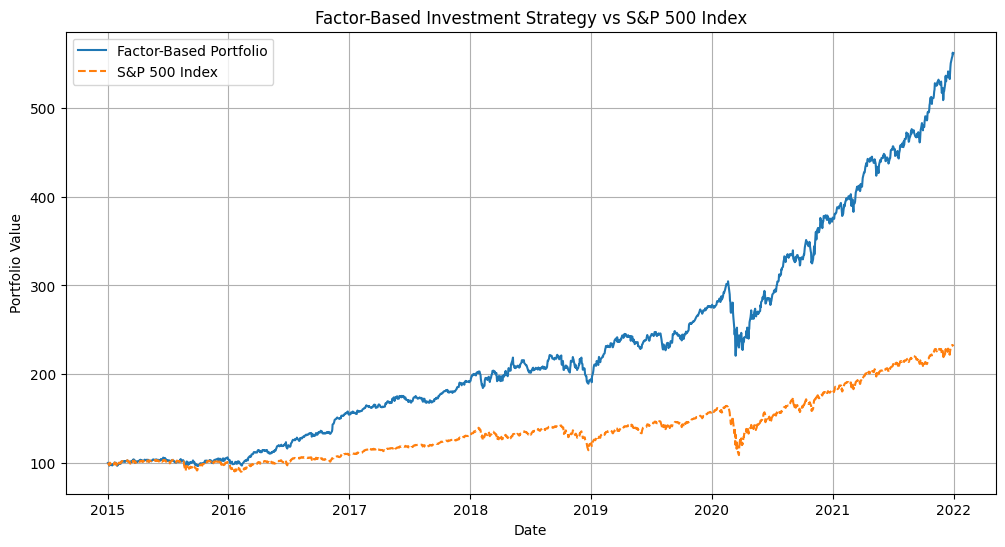

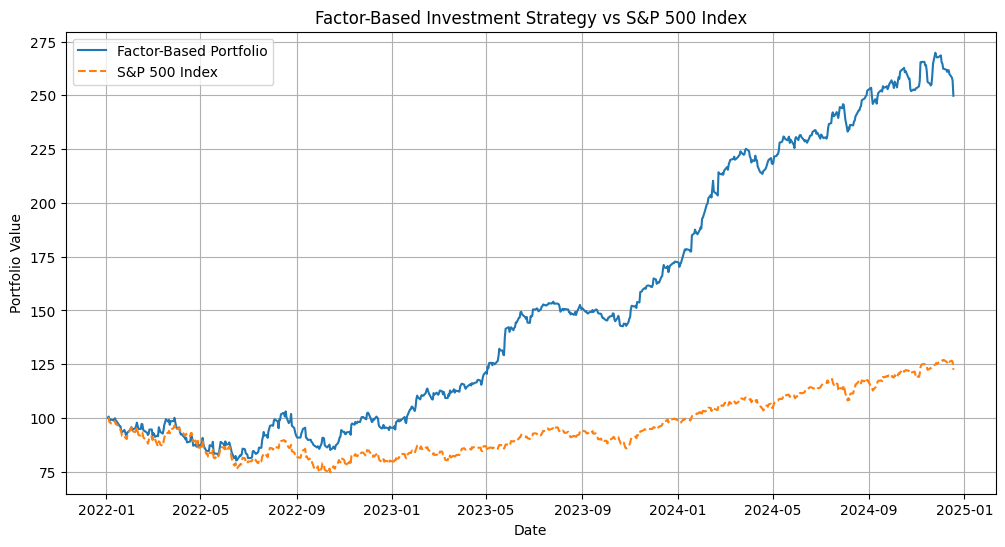

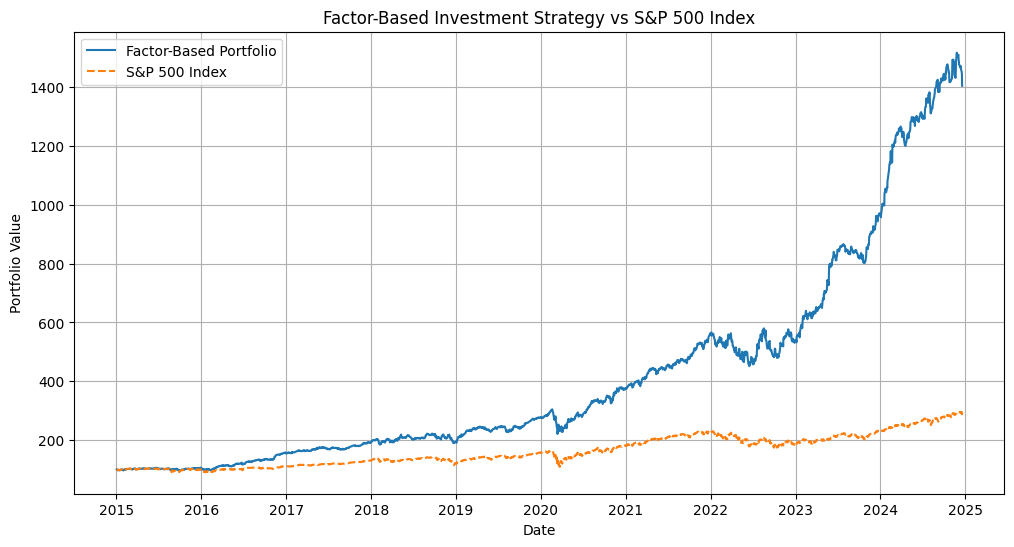

In [108]:

# 計算績效指標
def calculate_sharpe_ratio(returns, risk_free_rate=0.05, annualization_factor=252):
    excess_returns = returns - risk_free_rate / annualization_factor
    return excess_returns.mean() / returns.std() * np.sqrt(annualization_factor)

def calculate_max_drawdown(cumulative_returns):
    cumulative_max = cumulative_returns.cummax()
    drawdown = cumulative_returns / cumulative_max - 1
    return drawdown.min()

def calculate_annualized_return(cumulative_returns):
    total_return = cumulative_returns.iloc[-1] / cumulative_returns.iloc[0] - 1
    cumulative_returns.index = pd.to_datetime(cumulative_returns.index)
    num_years = (cumulative_returns.index[-1] - cumulative_returns.index[0]).days / 365.25
    return (1 + total_return) ** (1 / num_years) - 1

def calculate_cumulative_return(cumulative_returns):
    return cumulative_returns.iloc[-1] / cumulative_returns.iloc[0] - 1

def calculate_turnover(data, selected_stocks):
    selected_data = data[selected_stocks]
    trades = selected_data.pct_change().dropna().abs().sum(axis=1)
    avg_portfolio_value = selected_data.mean().mean()
    turnover = trades.mean() / avg_portfolio_value
    return turnover

def calculate_sortino_ratio(strategy_result, risk_free_rate=0.05, periods_per_year=252):
    # 將累積回報率轉換為每日回報率
    daily_returns = strategy_result.pct_change().dropna()
    
    # 計算每日無風險回報率
    daily_risk_free_rate = risk_free_rate / periods_per_year
    
    # 計算超額回報率
    excess_returns = daily_returns - daily_risk_free_rate
    
    # 計算下行偏差 (Downside Deviation)
    downside_returns = excess_returns[excess_returns < 0]
    downside_deviation = np.sqrt(np.mean(downside_returns ** 2))
    
    # 計算 Sortino Ratio
    sortino_ratio = excess_returns.mean() / downside_deviation
    
    return sortino_ratio




def show_bt_result(result, title):
    returns = result.pct_change().dropna()
    sharpe_ratio = calculate_sharpe_ratio(returns)
    max_drawdown = calculate_max_drawdown(result)
    annualized_return = calculate_annualized_return(result)
    cumulative_return = calculate_cumulative_return(result)
    sortino_ratio = calculate_sortino_ratio(result)
    # 輸出績效指標
    print(title)
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Maximum Drawdown: {max_drawdown:.2%}")
    print(f"Annualized Return: {annualized_return:.2%}")
    print(f"Cumulative Return: {cumulative_return:.2%}")
    print(f"Sortino Ratio: {sortino_ratio:.4f}")
    print()


first_hf_pd  = '2021-12-31'
second_hf_pd = '2022-01-01'

show_bt_result(         strategy_result[ : first_hf_pd], "策略測試期")
show_bt_result(cumulative_index_returns[ : first_hf_pd], '大盤測試期')

show_bt_result(         strategy_result[second_hf_pd : ], "策略驗證期")
show_bt_result(cumulative_index_returns[second_hf_pd : ], "大盤驗證期")


def Plot_result(Strategy_result, Cumulative_index_returns):
    # 繪圖
    plt.figure(figsize=(12, 6))
    plt.plot(Strategy_result, label='Factor-Based Portfolio')
    plt.plot(Cumulative_index_returns, label='S&P 500 Index', linestyle='--')
    plt.title('Factor-Based Investment Strategy vs S&P 500 Index')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.legend()
    plt.grid()
    plt.show()
    
Plot_result(strategy_result[ : first_hf_pd], cumulative_index_returns[ : first_hf_pd])
Plot_result(strategy_result[second_hf_pd : ] / strategy_result[second_hf_pd : ].iloc[0]*100, 
            cumulative_index_returns[second_hf_pd : ] / cumulative_index_returns[second_hf_pd : ].iloc[0]*100)
Plot_result(strategy_result, cumulative_index_returns)


In [280]:
for idx in range(1, len(date_ranges)):
    date_range = date_ranges[idx]
    start_date = date_range[0]
    end_date = date_range[1]
    sharpe = calculate_sharpe_ratio(strategy_result.pct_change().dropna()[start_date : end_date])
    print(sharpe)



-2.5375277991465484
3.030022883821008
-1.1059505259151585
0.6744268001158693
1.7668517566654356
0.2793900653943396
0.16606161178485163
-0.5818933596228419
-0.7821712516936656
6.215294109929301
1.300579984828844
-0.34406249471370093
-0.8283433144692409
4.494023405439302
7.878482933307716
-0.2990257894336431
5.06286711287056
0.2807849434708285
5.27737562043555
1.148097780357122
-0.1509043740885276
-2.4665981949066635
7.032747261532707
1.5759770040991732
5.692102084387352
2.24095131411849
2.607586119274697
1.9816173702563717
2.104009308004878
-1.1756866815855744
3.9776150161821624
0.874238128558091
3.5150069335036536
1.8661458057431728
7.576345715352295
-4.3288653494091545
5.463985349595465
-2.118090276541343
1.183272100857476
1.4432808543663533
6.474428664740971
-0.9717316644430881
4.09609232193531
3.2375521210787057
-5.579776435958347
-2.0720642132334848
1.7127157808986728
-4.696066804106836
5.7922015617098745
8.02704393827606
2.273730553163184
5.951905315591649
-5.656877197533134
7.554

[*********************100%***********************]  1 of 1 completed


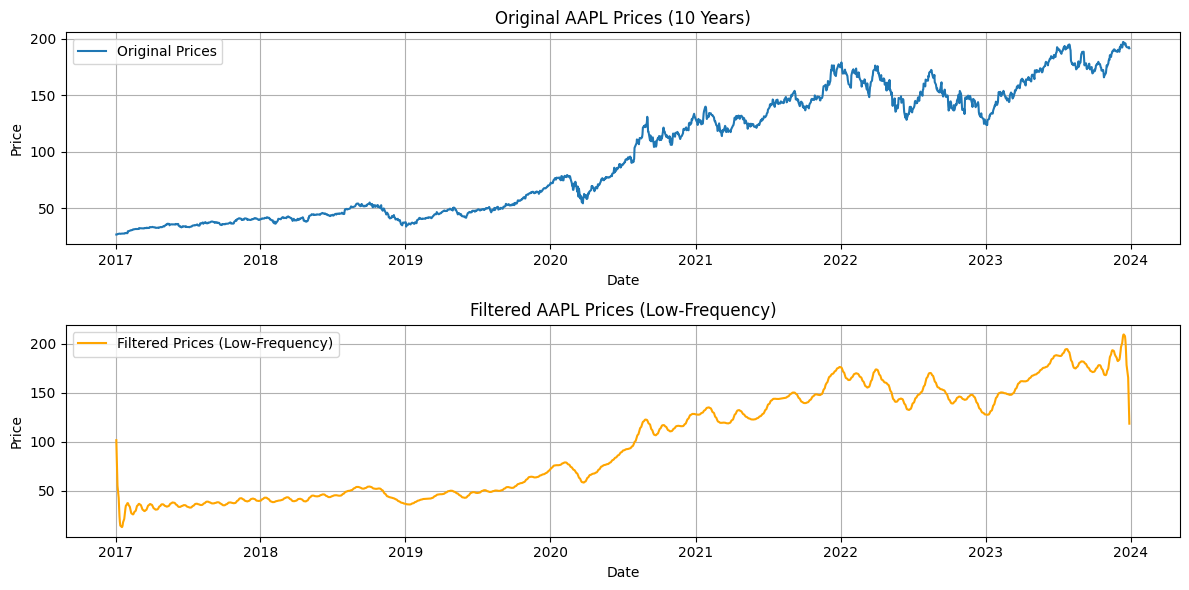

In [83]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# 1. 下載 AAPL 的股價數據 (10 年)
stock_data = yf.download("AAPL", start="2017-01-01", end="2023-12-31")

# 獲取調整後收盤價 (Adj Close)
prices = stock_data['Adj Close'].values
dates = stock_data.index

# 2. 對價格進行 FFT 分析
n = len(prices)
frequencies = np.fft.rfftfreq(n, d=1)  # 計算頻率
fft_result = np.fft.rfft(prices)  # 對價格進行快速傅里葉變換 (FFT)

# 去除高頻資訊
threshold = 0.05  # 頻率閾值，保留低於此頻率的資訊
fft_result[np.abs(frequencies) > threshold] = 0  # 將高頻部分設為 0

# 進行反傅里葉變換 (IFFT) 還原去高頻的價格
filtered_prices = np.fft.irfft(fft_result, n=n)

# 3. 繪製原始價格和過濾後的價格
plt.figure(figsize=(12, 6))

# 圖 1: 原始價格
plt.subplot(2, 1, 1)
plt.plot(dates, prices, label="Original Prices")
plt.title("Original AAPL Prices (10 Years)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()

# 圖 2: 去高頻的價格
plt.subplot(2, 1, 2)
plt.plot(dates, filtered_prices, label="Filtered Prices (Low-Frequency)", color="orange")
plt.title("Filtered AAPL Prices (Low-Frequency)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()

# 顯示圖表
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


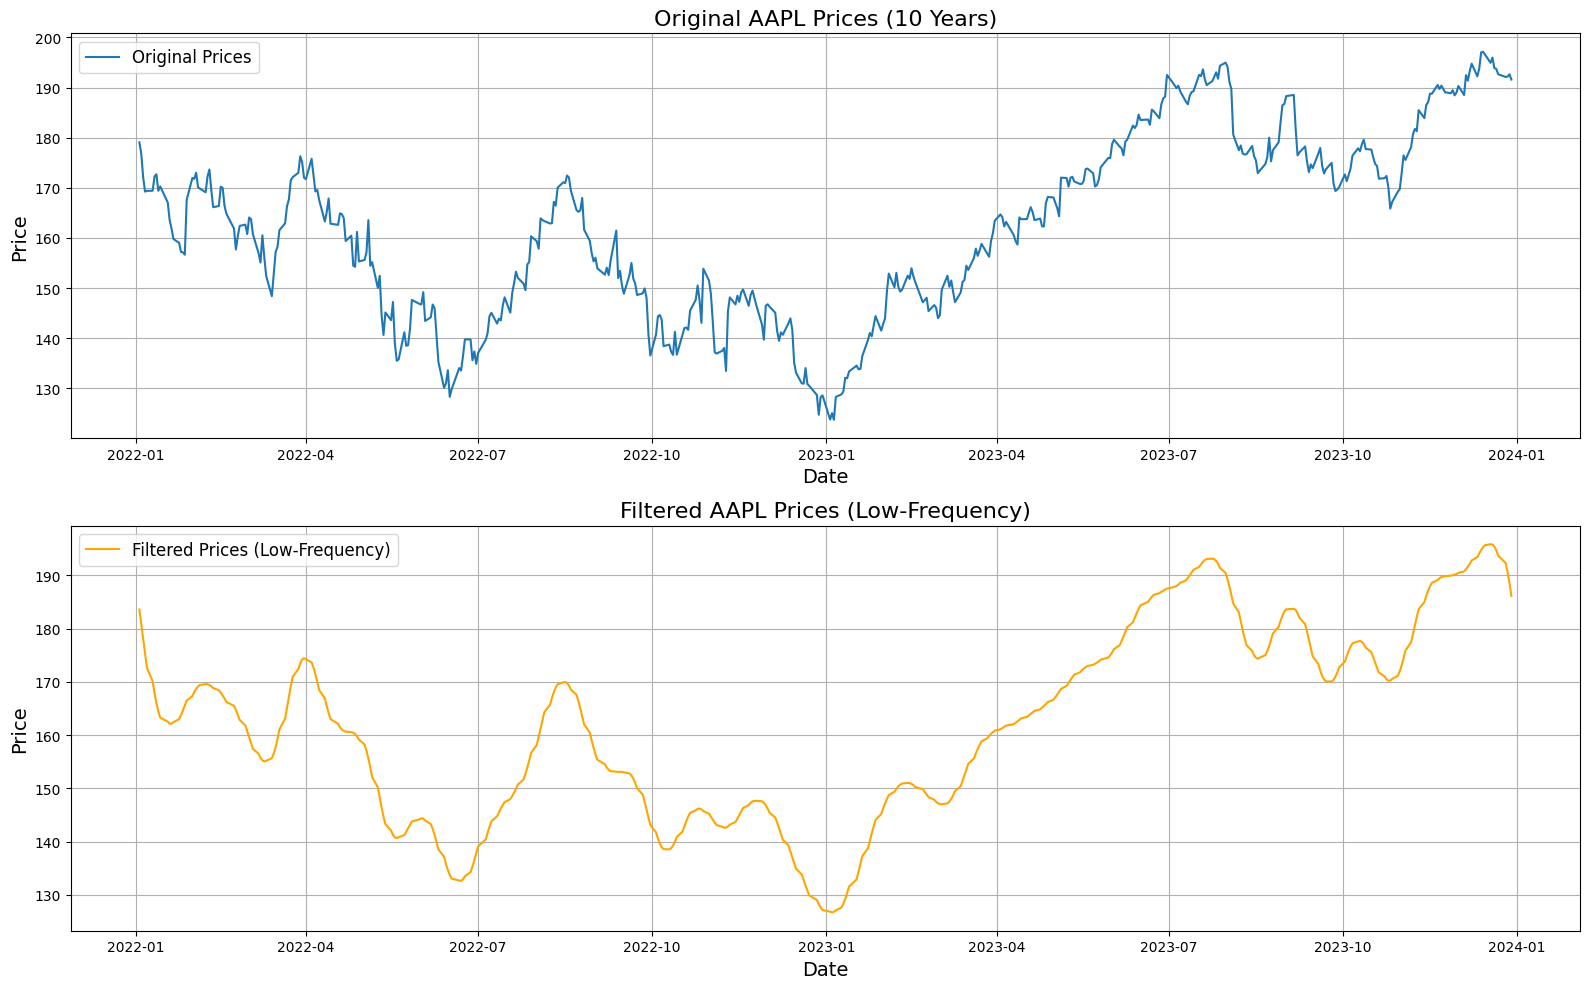

In [87]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# 1. 下載 AAPL 的股價數據 (10 年)
stock_data = yf.download("AAPL", start="2022-01-01", end="2023-12-31")

# 獲取調整後收盤價 (Adj Close)
prices = stock_data['Adj Close'].values
dates = stock_data.index

# 2. 對價格進行 FFT 分析
n = len(prices)
frequencies = np.fft.rfftfreq(n, d=1)  # 計算頻率
fft_result = np.fft.rfft(prices)  # 對價格進行快速傅里葉變換 (FFT)

# 去除高頻資訊
threshold = 0.05  # 頻率閾值，保留低於此頻率的資訊
fft_result[np.abs(frequencies) > threshold] = 0  # 將高頻部分設為 0

# 進行反傅里葉變換 (IFFT) 還原去高頻的價格
filtered_prices = np.fft.irfft(fft_result, n=n)

# 3. 繪製原始價格和過濾後的價格
plt.figure(figsize=(16, 10))  # 調整圖形大小

# 圖 1: 原始價格
plt.subplot(2, 1, 1)
plt.plot(dates, prices, label="Original Prices")
plt.title("Original AAPL Prices (10 Years)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend(fontsize=12)
plt.grid()

# 圖 2: 去高頻的價格
plt.subplot(2, 1, 2)
plt.plot(dates, filtered_prices, label="Filtered Prices (Low-Frequency)", color="orange")
plt.title("Filtered AAPL Prices (Low-Frequency)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend(fontsize=12)
plt.grid()

# 調整布局以避免圖形重疊
plt.tight_layout()
plt.show()
